# Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import gmaps
import json
from scipy.stats import sem,chisquare
from scipy.stats import linregress
from api_keys import g_key

# Import Google Maps API Key

In [2]:
gmaps.configure(api_key=g_key)

# Import Crime Data

In [3]:
filepath = "../AnyConv.com__Crime_Incidents_in_2017.csv"
df = pd.read_csv(filepath, low_memory=False)

df.head(3)

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
0,2111617,2017-02-06T20:11:14.000Z,EVENING,OTHERS,THEFT/OTHER,600 - 669 BLOCK OF MARYLAND AVENUE NE,400212,136281,6,6C,...,008302 1,8302.0,Precinct 84,38.894376,-76.997556,CAPITOL HILL,2017-02-01T11:55:55.000Z,NaN,306952475,02111617-01
1,7093973,2017-06-03T12:54:27.000Z,DAY,OTHERS,THEFT F/AUTO,2900 - 2999 BLOCK OF N STREET NW,394912,137666,2,2E,...,000100 4,100.0,Precinct 5,38.906838,-77.058661,NaN,2017-06-03T11:54:03.000Z,2017-06-03T11:55:05.000Z,306952489,07093973-01
2,17400847,2017-05-25T13:07:34.000Z,DAY,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF BRANDYWINE STREET NW,392231,142425,3,3E,...,001001 3,1001.0,Precinct 31,38.949689,-77.089625,NaN,2017-05-12T23:00:00.000Z,2017-05-13T09:00:00.000Z,306951085,17400847-01


# Rename Columns

- remove punctuation from column names
- create more user-friendly names

In [4]:
df.columns

Index(['CCN,C,80', 'REPORT_DAT,C,80', 'SHIFT,C,80', 'METHOD,C,80',
       'OFFENSE,C,80', 'BLOCK,C,80', 'XBLOCK,N,10,0', 'YBLOCK,N,10,0',
       'WARD,C,80', 'ANC,C,80', 'DISTRICT,C,80', 'PSA,C,80', 'NEIGHBORHO,C,80',
       'BLOCK_GROU,C,80', 'CENSUS_TRA,C,80', 'VOTING_PRE,C,80',
       'LATITUDE,N,24,15', 'LONGITUDE,N,24,15', 'BID,C,80', 'START_DATE,C,80',
       'END_DATE,C,80', 'OBJECTID,N,10,0', 'OCTO_RECOR,C,80'],
      dtype='object')

In [5]:
renamed_df = df.rename(columns={'CCN,C,80':'CCN', 'REPORT_DAT,C,80':'Report', 'SHIFT,C,80':'Shift', 
                                'METHOD,C,80':'Method', 'OFFENSE,C,80':'Offense', 'BLOCK,C,80':'Block',
                                'XBLOCK,N,10,0':'XBlock', 'YBLOCK,N,10,0':'YBlock','WARD,C,80':'Ward',
                                'ANC,C,80':'ANC', 'DISTRICT,C,80':'District', 'PSA,C,80':'PSA', 
                                'NEIGHBORHO,C,80':'Neighborhood','BLOCK_GROU,C,80':'Block_Grou', 
                                'CENSUS_TRA,C,80':'Census_Trac', 'VOTING_PRE,C,80':'Voting_Precinct',
                                'LATITUDE,N,24,15':'Latitude', 'LONGITUDE,N,24,15':'Longitude', 
                                'BID,C,80':'Bid', 'START_DATE,C,80':'Start_Date','END_DATE,C,80':'End_Date',
                                'OBJECTID,N,10,0':'Object_ID', 'OCTO_RECOR,C,80':'Octo_Recor' })
renamed_df.columns

Index(['CCN', 'Report', 'Shift', 'Method', 'Offense', 'Block', 'XBlock',
       'YBlock', 'Ward', 'ANC', 'District', 'PSA', 'Neighborhood',
       'Block_Grou', 'Census_Trac', 'Voting_Precinct', 'Latitude', 'Longitude',
       'Bid', 'Start_Date', 'End_Date', 'Object_ID', 'Octo_Recor'],
      dtype='object')

# Find Null Values

### Identify Columns with NaN

In [6]:
count_nan_in_df = renamed_df.isnull().sum()
#print (count_nan_in_df)
count_nan_in_df

CCN                    0
Report                 0
Shift                  0
Method                 0
Offense                0
Block                  0
XBlock                 0
YBlock                 0
Ward                   0
ANC                    0
District               3
PSA                    3
Neighborhood         370
Block_Grou            84
Census_Trac           84
Voting_Precinct        0
Latitude               0
Longitude              0
Bid                27252
Start_Date             0
End_Date            1497
Object_ID              0
Octo_Recor             0
dtype: int64

### Dropped Bid column

- was not being used

In [7]:
renamed_df.drop('Bid', axis=1, inplace=True)

### PSA column: Isolate Rows with NULL value

In [8]:
mask = renamed_df['PSA'].isnull()
renamed_df.loc[mask]

,CCN,Report,Shift,Method,Offense,Block,XBlock,YBlock,Ward,ANC,...,Neighborhood,Block_Grou,Census_Trac,Voting_Precinct,Latitude,Longitude,Start_Date,End_Date,Object_ID,Octo_Recor
184,17401844,2017-11-01T18:06:16.000Z,EVENING,OTHERS,THEFT F/AUTO,1700 - 1717 BLOCK OF CONSTITUTION AVENUE NE,401707,136018,6,6A,...,Cluster 26,008002 1,8002.0,Precinct 86,38.892005,-76.980324,2017-11-01T16:00:00.000Z,2017-11-01T16:05:00.000Z,306951319,17401844-01
185,17401847,2017-11-14T10:46:23.000Z,DAY,OTHERS,THEFT/OTHER,2400 - 2499 BLOCK OF M STREET NW,395459,137490,2,2A,...,Cluster 5,005500 2,5500.0,Precinct 4,38.905255,-77.052353,2017-10-29T10:30:00.000Z,2017-11-11T18:30:00.000Z,306951320,17401847-01
186,17401849,2017-11-04T08:06:19.000Z,DAY,OTHERS,THEFT/OTHER,1600 - 1699 BLOCK OF P STREET NW,396746,137976,2,2B,...,Cluster 6,005301 3,5301.0,Precinct 15,38.909639,-77.037518,2017-11-01T08:00:00.000Z,2017-11-02T17:00:00.000Z,306951321,17401849-01


### PSA column: Fill NaN with Median Value

In [9]:
renamed_df['PSA'] = renamed_df['PSA'].fillna(renamed_df['PSA'].median())

In [10]:
renamed_df['District'] = renamed_df['District'].fillna(renamed_df['District'].median())

In [11]:
renamed_df['Neighborhood'] = renamed_df['Neighborhood'].fillna(renamed_df['Neighborhood'].mode())

In [12]:
renamed_df['Census_Trac'] = renamed_df['Census_Trac'].fillna(renamed_df['Census_Trac'].median())

In [13]:
renamed_df['Block_Grou'] = renamed_df['Block_Grou'].fillna(renamed_df['Block_Grou'].mode())

In [14]:
renamed_df['End_Date'] = renamed_df['End_Date'].fillna(renamed_df['End_Date'].mode())

In [15]:
renamed_df.isnull().sum()

CCN                   0
Report                0
Shift                 0
Method                0
Offense               0
Block                 0
XBlock                0
YBlock                0
Ward                  0
ANC                   0
District              0
PSA                   0
Neighborhood        370
Block_Grou           84
Census_Trac           0
Voting_Precinct       0
Latitude              0
Longitude             0
Start_Date            0
End_Date           1496
Object_ID             0
Octo_Recor            0
dtype: int64

In [16]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33082 entries, 0 to 33081
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CCN              33082 non-null  int64  
 1   Report           33082 non-null  object 
 2   Shift            33082 non-null  object 
 3   Method           33082 non-null  object 
 4   Offense          33082 non-null  object 
 5   Block            33082 non-null  object 
 6   XBlock           33082 non-null  int64  
 7   YBlock           33082 non-null  int64  
 8   Ward             33082 non-null  int64  
 9   ANC              33082 non-null  object 
 10  District         33082 non-null  float64
 11  PSA              33082 non-null  float64
 12  Neighborhood     32712 non-null  object 
 13  Block_Grou       32998 non-null  object 
 14  Census_Trac      33082 non-null  float64
 15  Voting_Precinct  33082 non-null  object 
 16  Latitude         33082 non-null  float64
 17  Longitude   

# Convert Date Columns to Date Type

In [17]:
renamed_df['Start_Date'] = pd.to_datetime(renamed_df['Start_Date'], format='%Y-%m-%dT%H:%M:%S.%f')

In [18]:
renamed_df['End_Date'] = pd.to_datetime(renamed_df['End_Date'], format='%Y-%m-%dT%H:%M:%S.%f')

### Confirm Columns are now Timestamps

In [19]:
renamed_df['Start_Date'][1]

Timestamp('2017-06-03 11:54:03+0000', tz='UTC')

In [20]:
renamed_df['End_Date'][1]

Timestamp('2017-06-03 11:55:05+0000', tz='UTC')

# Convert Census_Trac Column to String

In [21]:
renamed_df['Census_Trac'] = renamed_df['Census_Trac'].astype(str)
type(renamed_df['Census_Trac'][1])

str

# Plot TimeSeries Of Crime

### Set 'Start_Date' as the Index 

In [22]:
date_df = renamed_df
date_df.sort_values('Start_Date', ascending=False, inplace=True)
date_df.set_index('Start_Date', inplace=True)

In [23]:
date_df.index.max()

Timestamp('2017-12-31 21:47:23+0000', tz='UTC')

In [24]:
date_df.index.min()

Timestamp('1980-06-02 20:00:46+0000', tz='UTC')

In [25]:
date_df.index.unique()

DatetimeIndex(['2017-12-31 21:47:23+00:00', '2017-12-31 19:44:06+00:00',
               '2017-12-31 18:50:04+00:00', '2017-12-31 17:18:18+00:00',
               '2017-12-31 17:06:21+00:00', '2017-12-31 16:59:27+00:00',
               '2017-12-31 16:10:06+00:00', '2017-12-31 15:56:09+00:00',
               '2017-12-31 15:05:07+00:00', '2017-12-31 14:30:46+00:00',
               ...
               '2012-03-29 11:02:37+00:00', '2010-11-27 15:00:00+00:00',
               '2010-11-26 03:00:08+00:00', '2010-07-27 21:00:23+00:00',
               '2010-05-01 20:21:06+00:00', '2009-02-13 12:03:45+00:00',
               '2009-01-17 00:00:55+00:00', '2007-03-21 15:52:49+00:00',
               '2007-03-01 12:00:03+00:00', '1980-06-02 20:00:46+00:00'],
              dtype='datetime64[ns, UTC]', name='Start_Date', length=32919, freq=None)

In [26]:
date_df.head()

,CCN,Report,Shift,Method,Offense,Block,XBlock,YBlock,Ward,ANC,...,PSA,Neighborhood,Block_Grou,Census_Trac,Voting_Precinct,Latitude,Longitude,End_Date,Object_ID,Octo_Recor
Start_Date,,,,,,,,,,,,,,,,,,,,,
2017-12-31 21:47:23+00:00,17224414,2017-12-31T22:57:01.000Z,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,4412 4499 BLOCK OF SOUTHERN AVENUE SE,405682,133941,7,7E,...,605.0,Cluster 33,007707 2,7707.0,Precinct 106,38.873278,-76.934521,2017-12-31 22:57:01+00:00,306951076,17224414-01
2017-12-31 19:44:06+00:00,17224392,2017-12-31T21:54:00.000Z,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,600 - 699 BLOCK OF NEWTON PLACE NW,398007,140667,1,1A,...,409.0,Cluster 2,003200 2,3200.0,Precinct 43,38.933884,-77.022987,2017-12-31 21:53:58+00:00,306951074,17224392-01
2017-12-31 18:50:04+00:00,17224331,2017-12-31T19:48:08.000Z,EVENING,OTHERS,THEFT F/AUTO,3100 - 3199 BLOCK OF K STREET NW,394626,137194,2,2E,...,206.0,Cluster 4,000100 4,100.0,Precinct 5,38.902584,-77.061955,2017-12-31 19:35:41+00:00,306951071,17224331-01
2017-12-31 17:18:18+00:00,17224289,2017-12-31T17:50:36.000Z,EVENING,OTHERS,THEFT/OTHER,3100 - 3299 BLOCK OF ADAMS STREET NE,403249,139270,5,5C,...,503.0,Cluster 24,011100 1,11100.0,Precinct 71,38.921296,-76.962534,2017-12-31 17:50:34+00:00,306951069,17224289-01
2017-12-31 17:06:21+00:00,17224286,2017-12-31T17:57:14.000Z,EVENING,OTHERS,THEFT/OTHER,4600 - 4699 BLOCK OF HILLSIDE ROAD SE,405846,134296,7,7E,...,604.0,Cluster 33,007707 1,7707.0,Precinct 106,38.876475,-76.932628,2017-12-31 17:40:29+00:00,306951068,17224286-01


In [27]:
date_agg_df = date_df.groupby('Start_Date').count()
date_agg_df.head(1)

,CCN,Report,Shift,Method,Offense,Block,XBlock,YBlock,Ward,ANC,...,PSA,Neighborhood,Block_Grou,Census_Trac,Voting_Precinct,Latitude,Longitude,End_Date,Object_ID,Octo_Recor
Start_Date,,,,,,,,,,,,,,,,,,,,,
1980-06-02 20:00:46+00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


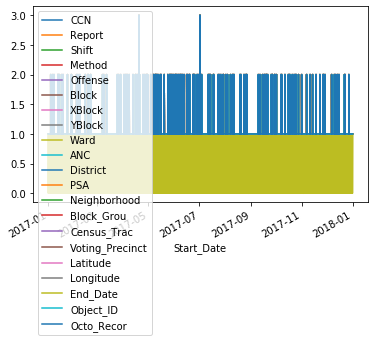

In [28]:
date_agg_df["2017-01-01":"2017-12-31"].plot();

### Dataset covers 1980 - 2017

- not only 2017

In [29]:
date_df.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2012, 2010, 2010, 2010, 2010, 2009, 2009, 2007, 2007, 1980],
           dtype='int64', name='Start_Date', length=33082)

In [30]:
date_df.head(3)

,CCN,Report,Shift,Method,Offense,Block,XBlock,YBlock,Ward,ANC,...,PSA,Neighborhood,Block_Grou,Census_Trac,Voting_Precinct,Latitude,Longitude,End_Date,Object_ID,Octo_Recor
Start_Date,,,,,,,,,,,,,,,,,,,,,
2017-12-31 21:47:23+00:00,17224414,2017-12-31T22:57:01.000Z,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,4412 4499 BLOCK OF SOUTHERN AVENUE SE,405682,133941,7,7E,...,605.0,Cluster 33,007707 2,7707.0,Precinct 106,38.873278,-76.934521,2017-12-31 22:57:01+00:00,306951076,17224414-01
2017-12-31 19:44:06+00:00,17224392,2017-12-31T21:54:00.000Z,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,600 - 699 BLOCK OF NEWTON PLACE NW,398007,140667,1,1A,...,409.0,Cluster 2,003200 2,3200.0,Precinct 43,38.933884,-77.022987,2017-12-31 21:53:58+00:00,306951074,17224392-01
2017-12-31 18:50:04+00:00,17224331,2017-12-31T19:48:08.000Z,EVENING,OTHERS,THEFT F/AUTO,3100 - 3199 BLOCK OF K STREET NW,394626,137194,2,2E,...,206.0,Cluster 4,000100 4,100.0,Precinct 5,38.902584,-77.061955,2017-12-31 19:35:41+00:00,306951071,17224331-01


# Write Modified DataFrame to CSV

- new CSV file will be merged with Washington 2017 Poverty Dataset

In [31]:
renamed_df.to_csv("renamed_crime_data.csv", index=False)

# Overview of Data

In [32]:
renamed_df.describe()

,CCN,XBlock,YBlock,Ward,District,PSA,Latitude,Longitude,Object_ID
count,3.308200e+04,33082.000000,33082.000000,33082.000000,33082.000000,33082.000000,33082.000000,33082.000000,3.308200e+04
mean,1.712021e+07,399396.652711,137623.379451,4.456139,3.721329,376.865244,38.906463,-77.006963,3.072805e+08
std,1.502723e+05,3150.374167,3358.194998,2.335491,1.909376,190.723370,0.030251,0.036323,6.578455e+04
min,2.111617e+06,390262.000000,127300.000000,1.000000,1.000000,101.000000,38.813471,-77.112316,3.069501e+08
25%,1.705836e+07,397302.250000,136093.000000,2.000000,2.000000,207.000000,38.892672,-77.031103,3.072732e+08
50%,1.711666e+07,399074.000000,137579.000000,5.000000,3.000000,308.000000,38.906061,-77.010676,3.072815e+08
75%,1.717467e+07,401342.250000,139586.000000,6.000000,5.000000,507.000000,38.924144,-76.984522,3.073028e+08
max,2.709178e+07,407806.000000,147292.000000,8.000000,7.000000,708.000000,38.993560,-76.910021,3.073348e+08


In [33]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33082 entries, 2017-12-31 21:47:23+00:00 to 1980-06-02 20:00:46+00:00
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   CCN              33082 non-null  int64              
 1   Report           33082 non-null  object             
 2   Shift            33082 non-null  object             
 3   Method           33082 non-null  object             
 4   Offense          33082 non-null  object             
 5   Block            33082 non-null  object             
 6   XBlock           33082 non-null  int64              
 7   YBlock           33082 non-null  int64              
 8   Ward             33082 non-null  int64              
 9   ANC              33082 non-null  object             
 10  District         33082 non-null  float64            
 11  PSA              33082 non-null  float64            
 12  Neighborhood     32712 non-

- 33082 rows total
- following rows are missing data
- DISTRICT,C,80
- PSA,C,80
- NEIGHBORHO,C,80
- BLOCK_GROU,C,80
- CENSUS_TRA,C,80
- BID,C,80
- END_DATE,C,80

# Create Google Map of Crime

### Create Heatmap based on Crime by Census Tract

- Aggregate Crime Statistics by Census Tract, Latitude & Longitude

In [34]:
maps_df = renamed_df.groupby(['Census_Trac', 'Latitude', 'Longitude']).count()['CCN']
maps_df = pd.DataFrame(maps_df)
maps_df.reset_index(inplace=True)
maps_df.head()

,Census_Trac,Latitude,Longitude,CCN
0,100.0,38.902550,-77.058577,4
1,100.0,38.902584,-77.061955,27
2,100.0,38.902585,-77.059614,19
3,100.0,38.902594,-77.060629,20
4,100.0,38.903008,-77.061137,2


In [35]:
locations = maps_df[['Latitude','Longitude']]

num_of_crimes = maps_df.CCN

figure_layout = {
    'width': '950px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(map_type="HYBRID", layout=figure_layout)
heat_layer = gmaps.heatmap_layer(locations, weights=num_of_crimes, dissipating=True)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

# Types of Offenses

- Here is a list of the various types of crime.

In [36]:
renamed_df.Offense.unique()

array(['ASSAULT W/DANGEROUS WEAPON', 'THEFT F/AUTO', 'THEFT/OTHER',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'BURGLARY',
       'HOMICIDE', 'ARSON'], dtype=object)

### Volume of Crime by Type

In [37]:
offense_type = renamed_df.groupby(['Offense']).count()['CCN']
offense_type = pd.DataFrame(offense_type)
offense_type.sort_values('CCN', ascending=False, inplace=True)
offense_type = offense_type.rename(columns={'CCN': 'Frequency in 2017'})
offense_type.index.names = ['Type of Crime']
offense_type

,Frequency in 2017
Type of Crime,
THEFT/OTHER,14445
THEFT F/AUTO,10259
MOTOR VEHICLE THEFT,2408
ROBBERY,2170
ASSAULT W/DANGEROUS WEAPON,1856
BURGLARY,1531
SEX ABUSE,293
HOMICIDE,115
ARSON,5


# Pie Chart: Types of Weapon

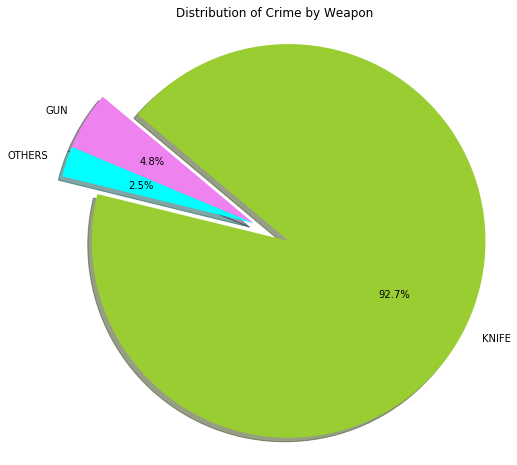

In [38]:
labels = renamed_df.Method.unique()
sizes = renamed_df.groupby(['Method'])["CCN"].count()
colors = ["violet", "aqua", "yellowgreen"]
explode = (0, 0, 0.2)

plt.figure(figsize=(8, 8))
plt.title("Distribution of Crime by Weapon")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Histograms

### Create Function to Plot Histogram

In [39]:
def plotHistogram(col, df):
    #Groupby operation on Target Column
    #Assign to temporarily DataFrame
    sub_df = df.groupby([col]).count()['CCN']
    sub_df = pd.DataFrame(sub_df)
    sub_df.sort_values('CCN', ascending=False, inplace=True)

    #Plot Histogram
    chart = sub_df.plot(kind="hist", color="yellowgreen", grid="True", figsize=(8,8), 
                        bins=100, title=f"Histogram of {col}")
    chart.set_ylabel("Frequency of Offenses")
    plt.show()

In [40]:
def matplotHistogram(col, df):

    #Plot Bar Chart
    plt.figure(figsize=(8, 8))
    plt.hist(df[col], 100, color='indigo', alpha=0.75)
    #plt.xticks(rotation=90)
    plt.title(f"Washington Crime Statistics 2017 by {col}", fontsize=16, fontweight="bold")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency of Offences")
    axes = plt.gca()
    axes.yaxis.grid()
    plt.show

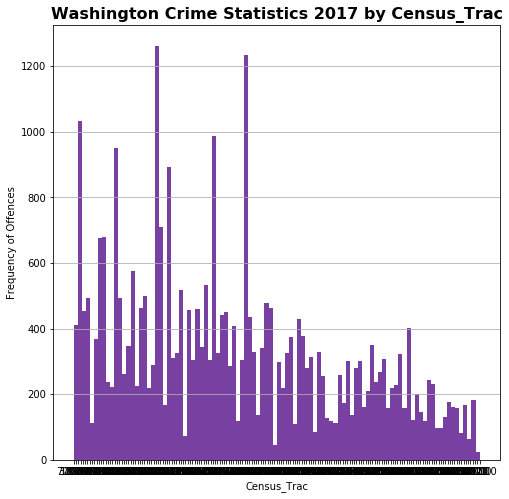

In [41]:
matplotHistogram('Census_Trac', renamed_df)

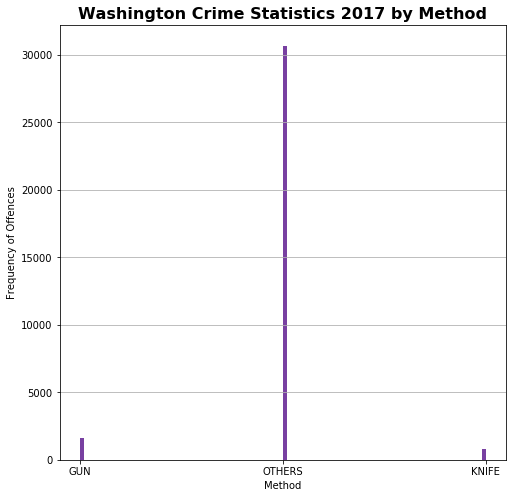

In [42]:
matplotHistogram('Method', renamed_df)

In [43]:
renamed_df.columns

Index(['CCN', 'Report', 'Shift', 'Method', 'Offense', 'Block', 'XBlock',
       'YBlock', 'Ward', 'ANC', 'District', 'PSA', 'Neighborhood',
       'Block_Grou', 'Census_Trac', 'Voting_Precinct', 'Latitude', 'Longitude',
       'End_Date', 'Object_ID', 'Octo_Recor'],
      dtype='object')

### Create Histograms for Each Column

In [44]:
cols = ['Report', 'Shift', 'Method', 'Offense', 'Block', 'XBlock',
       'YBlock', 'Ward', 'ANC', 'District', 'PSA', 'Neighborhood',
       'Block_Grou', 'Census_Trac', 'Voting_Precinct', 'Latitude', 'Longitude',
       'Bid', 'Start_Date', 'End_Date', 'Object_ID', 'Octo_Recor']

- Graphs indicate that none of these variable demonstrate a normal distribution 

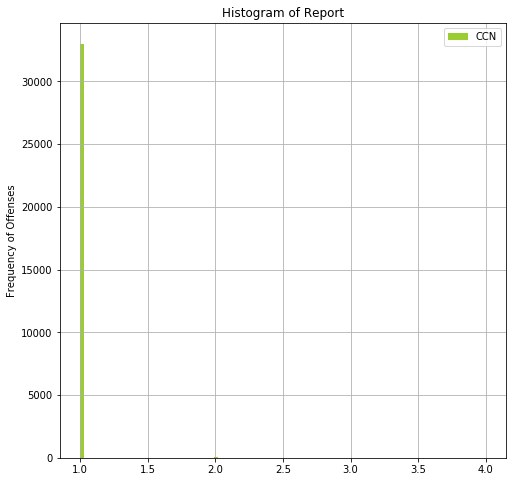

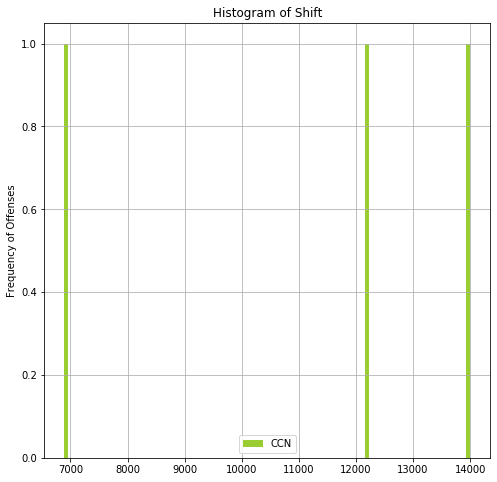

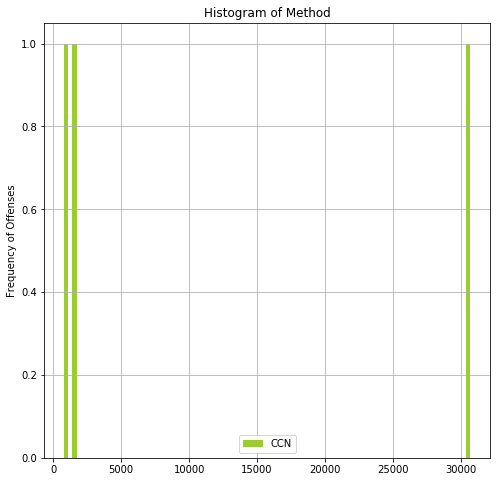

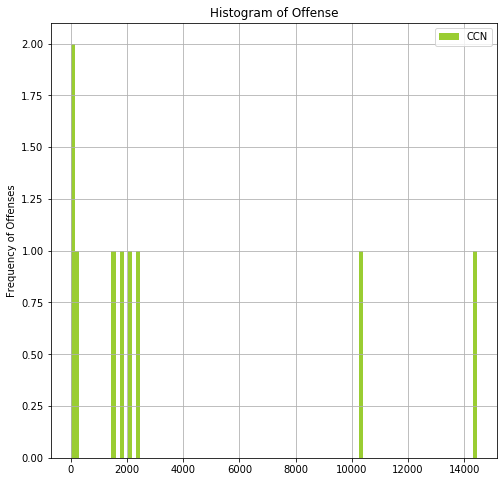

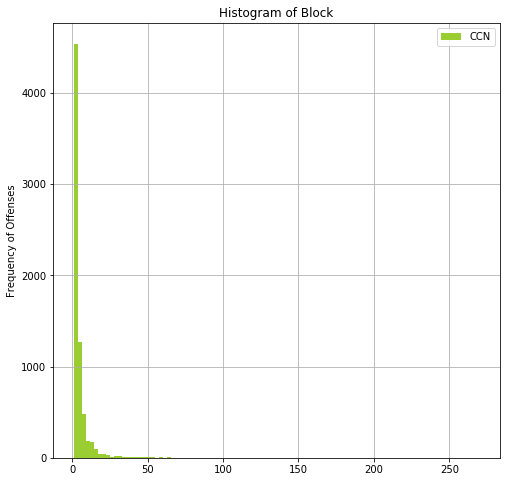

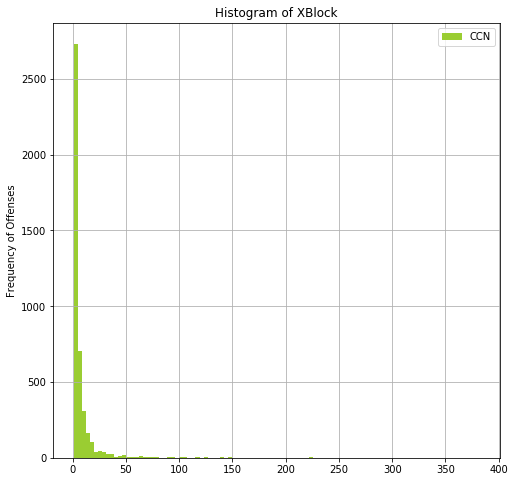

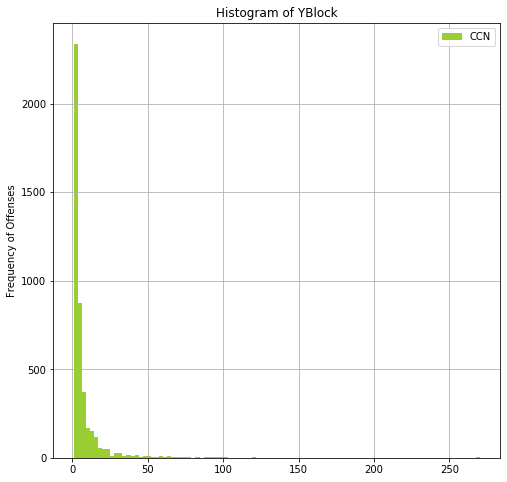

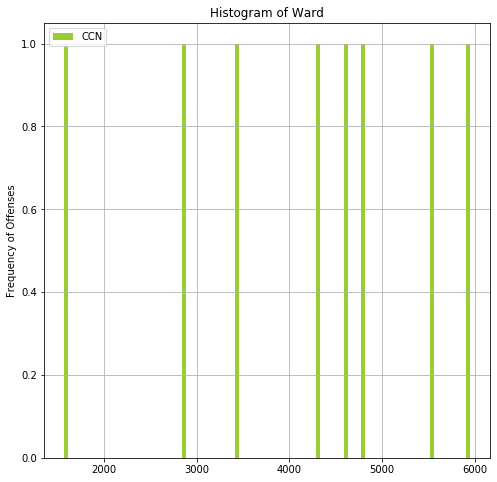

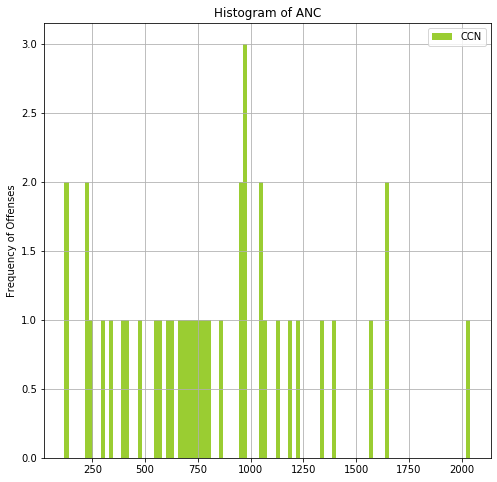

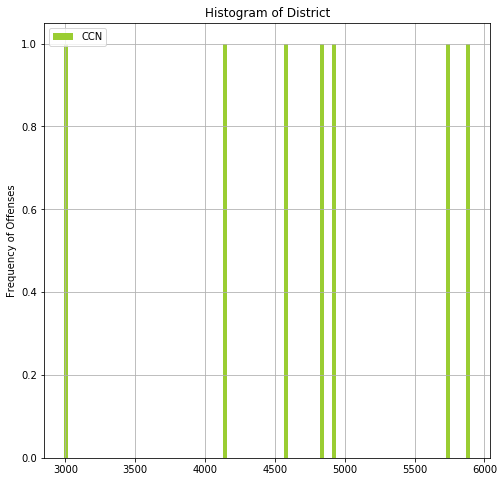

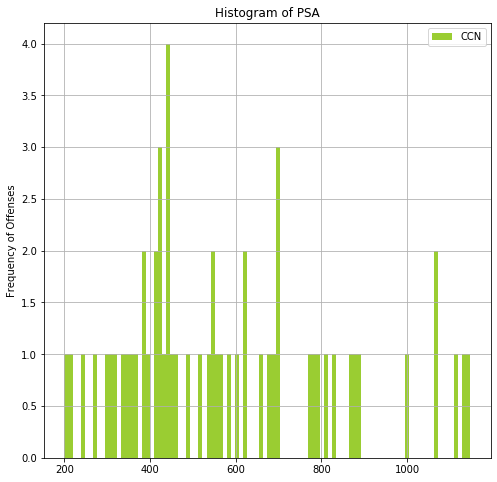

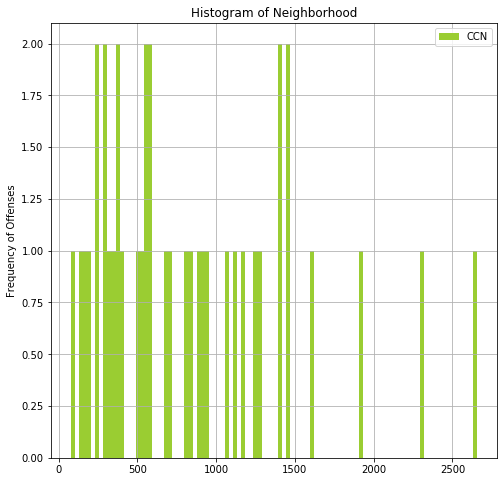

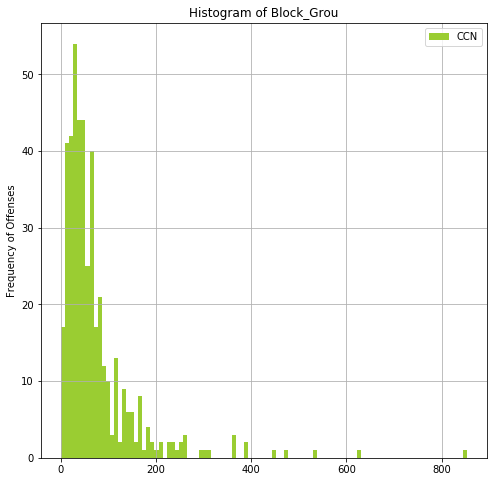

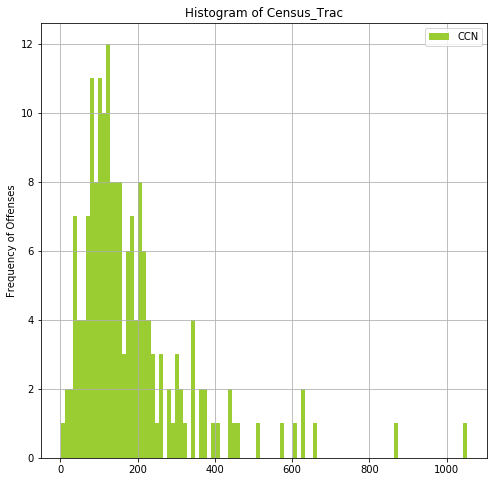

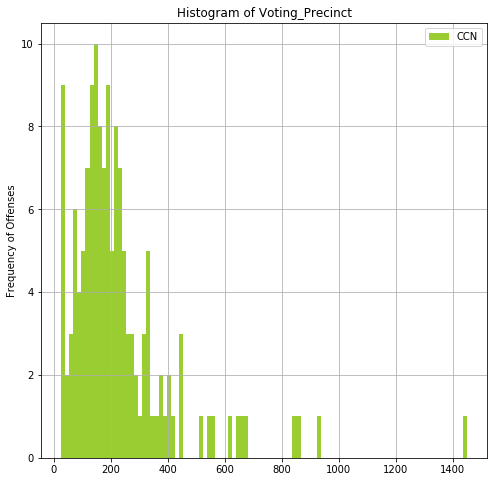

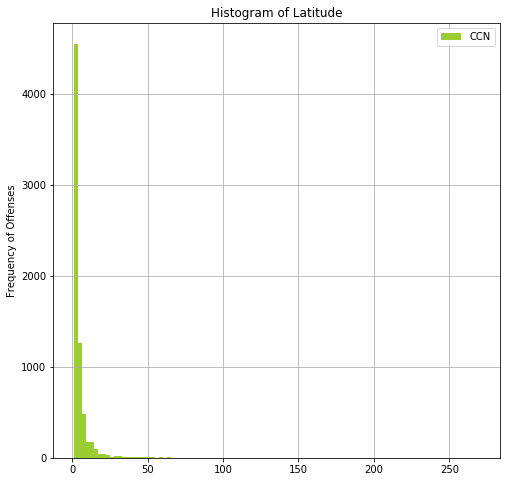

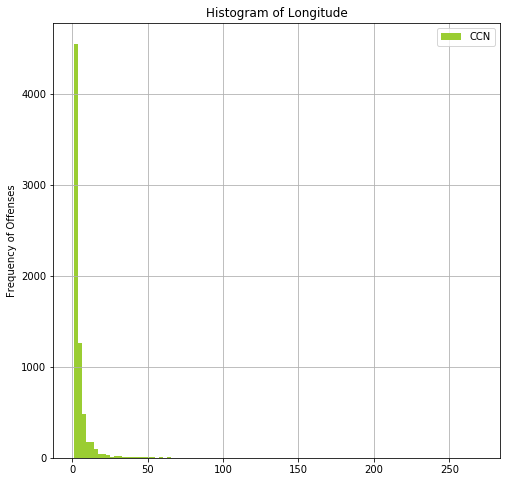

KeyError: 'Bid'

In [45]:
for col in cols:
    plotHistogram(col,renamed_df)

# Bar Charts

### Create Function to Plot Bar Chart

In [ ]:
def matplotBarChart(col, df):
    #Groupby operation on Target Column
    #Assign to temporarily DataFrame
    #Sort & capture top 10
    sub_df = df.groupby([col]).count()['CCN']
    sub_df = pd.DataFrame(sub_df)
    sub_df.sort_values('CCN', ascending=False, inplace=True)
    sub_df = sub_df.head(10)

    #Plot Bar Chart
    plt.figure(figsize=(8, 8))
    plt.bar(sub_df.index, sub_df['CCN'], color='indigo', align="center")
    plt.xticks(rotation=90)
    plt.title(f"Washington Crime Statistics 2017 by {col}", fontsize=16, fontweight="bold")
    plt.xlabel(f"{col}")
    plt.ylabel("Number of Offences")
    axes = plt.gca()
    axes.yaxis.grid()
    plt.show

### Crime by Type of Offense

In [ ]:
matplotBarChart('Offense', renamed_df)

### Crime by Census Tract

In [ ]:
matplotBarChart('Census_Trac', renamed_df)

# Crime by Weapon

In [ ]:
matplotBarChart('Method', renamed_df)

# Correlation

Many of the fields in this dataset were related to location (e.g. XBlock, Ward,Census Tract, Voting Precinct, Latitude, Longitude).
Consequently, it was difficult to find meaningful correlations.

In [ ]:
renamed_df.corr()

### Heatmap to Illustrate Correlation

In [ ]:
sn.heatmap(renamed_df.corr())
plt.show()

# Scatter Plots

As discussed above, scatter plots do not illustrate any meaning correlations

### Function to Create Scatter Plot

In [ ]:
def makeScatter(col1, col2, df):  
    plt.figure(figsize=(8, 8))
    plt.scatter(df[col1], df[col2], c="blueviolet", edgecolors="black", alpha=0.35)
    plt.title(f"{col1.title()} vs {col2.title()}")
    plt.xlabel(f"{col1.title()}")
    plt.ylabel(f"{col2.title()}")
    plt.tight_layout
    plt.show()

### Create List of Variables for Scatter Plots

In [ ]:
cols = ['CCN', 'XBlock', 'YBlock', 'Ward', 'District', 'PSA', 'Census_Trac',
       'Latitude', 'Longitude', 'Object_ID']

### Create Scatter Plots for Census Trac

In [ ]:
for col in cols:
    makeScatter("Census_Trac", col, renamed_df)

# Chisquared Analysis

In [ ]:
rr_df = renamed_df.groupby(renamed_df.Census_Trac).count()['CCN']
rr_df

sub_df = pd.DataFrame(rr_df)
sub_df.sort_values('CCN', ascending=False, inplace=True)
sub_df = sub_df.head(10)
sub_df

In [ ]:
(sub_df['CCN'].sum())/10

In [ ]:
sub_df["Expected"]=643.2

In [ ]:
chisquare(sub_df['CCN'],sub_df['Expected'])

In [ ]:
new_list =[1000, 850, 650, 630, 630, 600, 550, 500, 450, 450]
sub_df['Expected']= new_list
sub_df

In [ ]:
chisquare(sub_df['CCN'],sub_df['Expected'])